In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_13_4.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_13_4.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(160, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(160, activation = 'relu'),
    tf.keras.layers.Dense(160, activation = 'relu'),
    tf.keras.layers.Dense(160, activation = 'relu'),
    tf.keras.layers.Dense(160, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 150, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/150
100000/100000 - 3s - loss: 0.3044 - accuracy: 0.8777 - val_loss: 0.2658 - val_accuracy: 0.8902
Epoch 2/150
100000/100000 - 2s - loss: 0.2557 - accuracy: 0.8922 - val_loss: 0.2420 - val_accuracy: 0.8968
Epoch 3/150
100000/100000 - 2s - loss: 0.2284 - accuracy: 0.9037 - val_loss: 0.2166 - val_accuracy: 0.9088
Epoch 4/150
100000/100000 - 3s - loss: 0.2045 - accuracy: 0.9127 - val_loss: 0.1946 - val_accuracy: 0.9153
Epoch 5/150
100000/100000 - 2s - loss: 0.1871 - accuracy: 0.9181 - val_loss: 0.1864 - val_accuracy: 0.9167
Epoch 6/150
100000/100000 - 2s - loss: 0.1757 - accuracy: 0.9218 - val_loss: 0.1745 - val_accuracy: 0.9217
Epoch 7/150
100000/100000 - 2s - loss: 0.1649 - accuracy: 0.9256 - val_loss: 0.1637 - val_accuracy: 0.9259
Epoch 8/150
100000/100000 - 2s - loss: 0.1556 - accuracy: 0.9294 - val_loss: 0.1600 - val_accuracy: 0.9272
Epoch 9/150
100000/100000 - 2s - loss: 0.1479 - accuracy: 0.9331 - val_loss: 0.1551 - val_accu

Epoch 77/150
100000/100000 - 2s - loss: 0.0260 - accuracy: 0.9902 - val_loss: 0.0667 - val_accuracy: 0.9795
Epoch 78/150
100000/100000 - 2s - loss: 0.0249 - accuracy: 0.9907 - val_loss: 0.0687 - val_accuracy: 0.9798
Epoch 79/150
100000/100000 - 2s - loss: 0.0275 - accuracy: 0.9899 - val_loss: 0.0688 - val_accuracy: 0.9785
Epoch 80/150
100000/100000 - 2s - loss: 0.0264 - accuracy: 0.9904 - val_loss: 0.0622 - val_accuracy: 0.9804
Epoch 81/150
100000/100000 - 2s - loss: 0.0231 - accuracy: 0.9915 - val_loss: 0.0661 - val_accuracy: 0.9796
Epoch 82/150
100000/100000 - 2s - loss: 0.0248 - accuracy: 0.9909 - val_loss: 0.0614 - val_accuracy: 0.9818
Epoch 83/150
100000/100000 - 2s - loss: 0.0235 - accuracy: 0.9913 - val_loss: 0.0692 - val_accuracy: 0.9800
Epoch 84/150
100000/100000 - 2s - loss: 0.0261 - accuracy: 0.9904 - val_loss: 0.0659 - val_accuracy: 0.9809
Epoch 85/150
100000/100000 - 2s - loss: 0.0257 - accuracy: 0.9905 - val_loss: 0.0663 - val_accuracy: 0.9798
Epoch 86/150
100000/100000 -

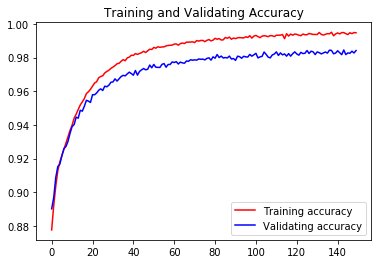

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_13_4_model.h5')